In [2]:
import numpy as py
import pandas as pd
fuz_df = pd.read_csv('title.csv',encoding='utf-8')
#fuz_df.columns = ['日期','通知人','标题','链接','none']
# fuz_df = fuz_df.drop('none', axis=1)
# fuz_df = fuz_df.drop(0, axis=0)
# fuz_df.to_csv('title.csv',index = False)
fuz_df

,日期,通知人,标题,链接
0,2024/12/25,【教材中心】,关于开展本科教材工作自查的通知,https://jwch.fzu.edu.cn/content.jsp?urltype=ne...
1,2024/12/25,【教学运行】,关于2024-2025学年第一学期《工程制图C（上）》、《工程制图D》和《工程制图F》课程期...,https://jwch.fzu.edu.cn/info/1036/13815.htm
2,2024/12/25,【教学运行】,关于2024-2025学年第一学期《大学英语（二）》课程期末考试安排的通知,https://jwch.fzu.edu.cn/info/1036/13814.htm
3,2024/12/25,【教学运行】,关于2024-2025学年第一学期《大学英语（一）》和《大学英语（三）》课程期末考试安排的通知,https://jwch.fzu.edu.cn/info/1036/13813.htm
4,2024/12/25,【教学运行】,关于2025年元旦放假课程调整的通知,https://jwch.fzu.edu.cn/info/1036/13812.htm
...,...,...,...,...
615,2022/3/13,【教学运行】,关于疫情防控阶段本科日常教学工作的通知,https://jwch.fzu.edu.cn/../info/1036/11886.htm
616,2022/3/10,【质量办】,关于做好2021年课程考核专项检查整改工作的通知,https://jwch.fzu.edu.cn/../info/1040/11884.htm
617,2022/3/8,【教学运行】,关于2021-2022学年第二学期重修选课的通知,https://jwch.fzu.edu.cn/../info/1036/11883.htm
618,2022/3/4,【实践科】,关于举办福州大学第六届网络信息安全竞赛的通知,https://jwch.fzu.edu.cn/../info/1039/11877.htm


In [3]:
fuz_df['通知人'].value_counts(normalize=False)#每个单位的总个数
fuz_df['通知人'].value_counts(normalize=True)#根据总计数求频率

通知人
【教学运行】    0.316129
【实践科】     0.266129
【计划科】     0.116129
【质量办】     0.106452
【教研教改】    0.085484
【综合科】     0.070968
【教材中心】    0.037097
【教学通知】    0.001613
Name: proportion, dtype: float64

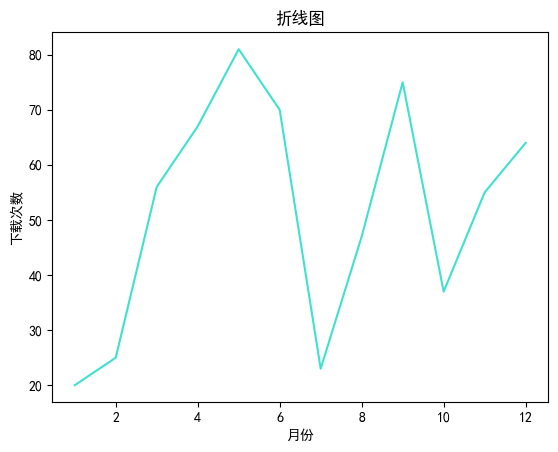

In [59]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei'] # 中文字体

fuz_df['日期'] = pd.to_datetime(fuz_df['日期'],format='%Y/%m/%d',errors='coerce')  # 字符串格式转换为datetime格式

# 以月份为单位统计每个月的通知数
daily_notifications = fuz_df.groupby(fuz_df['日期'].dt.month).size()

import matplotlib.pyplot as plt
daily_notifications.plot(kind='line', title='折线图',color= 'turquoise')
plt.xlabel('月份')
plt.ylabel('下载次数')
plt.show()


In [22]:
month_ily = fuz_df.groupby(fuz_df['日期'].dt.to_period('M')).size()
type(month_ily)

pandas.core.series.Series

In [46]:
values = month_ily.values.tolist()

index = [str(month_ily.index[i]) for i in range(len(month_ily.index))]

#values = pd.Series(values)

In [50]:
import numpy as np
listmin = np.argsort(values)[:4]
listmax = np.argsort(values)[-4:]

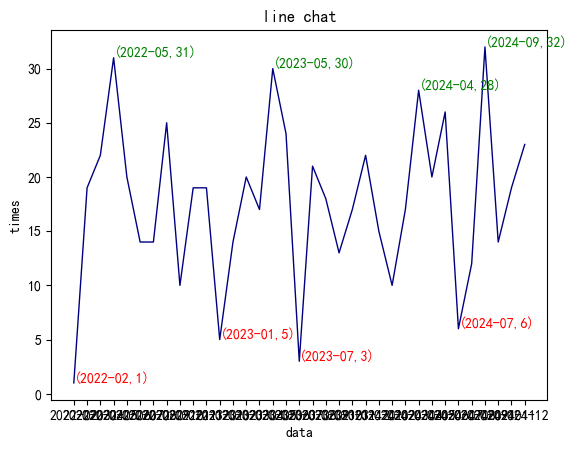

In [70]:
plt.plot(index,values,color='navy',linewidth = 1)
plt.title('line chat')
plt.xlabel('data')
plt.ylabel('times')
for i in listmin:
    plt.text(index[i],values[i],f'({index[i]},{values[i]})',fontsize=10,color = 'red') 
for i in listmax:
    plt.text(index[i],values[i],f'({index[i]},{values[i]})',fontsize=10,color = 'green')    
plt.show()

In [ ]:
import numpy as py
import pandas as pd

with open("./title.csv", mode='w', newline='', encoding='utf-8') as file:
    header = ['日期','通知人','标题','链接']
    write = csv.writer(file)
    write.writerow(header)

fuz_df = pd.read_csv('title.csv',encoding='utf-8')
fuz_df = fuz_df.dropna()
fuz_df.to_csv('fuz_df.csv', index=False)
fuz_df = fuz_df.reset_index(drop=True)
fuz_df

fuz_df['【教材中心】'].value_counts(normalize=False)
fuz_df['【教材中心】'].value_counts(normalize=True)